In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [4]:
train_df[187]=train_df[187].astype(int)
train_df[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

In [5]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [6]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
39737,0.993651,0.844444,0.234921,0.068254,0.322222,0.368254,0.320635,0.312698,0.322222,0.331746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74285,0.872054,0.791246,0.447811,0.176768,0.156566,0.173401,0.148148,0.138047,0.139731,0.143098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
79533,0.909836,1.000000,0.909836,0.866803,0.815574,0.793033,0.778689,0.727459,0.504098,0.270492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80571,1.000000,0.803970,0.527295,0.305211,0.163772,0.145161,0.145161,0.120347,0.112903,0.114144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
84932,0.989595,0.947977,0.886705,0.830058,0.730636,0.619653,0.494798,0.371098,0.269364,0.217341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


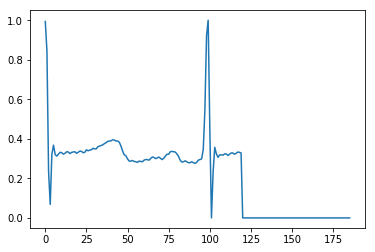

In [7]:
 plt.plot(c.iloc[0,:186])

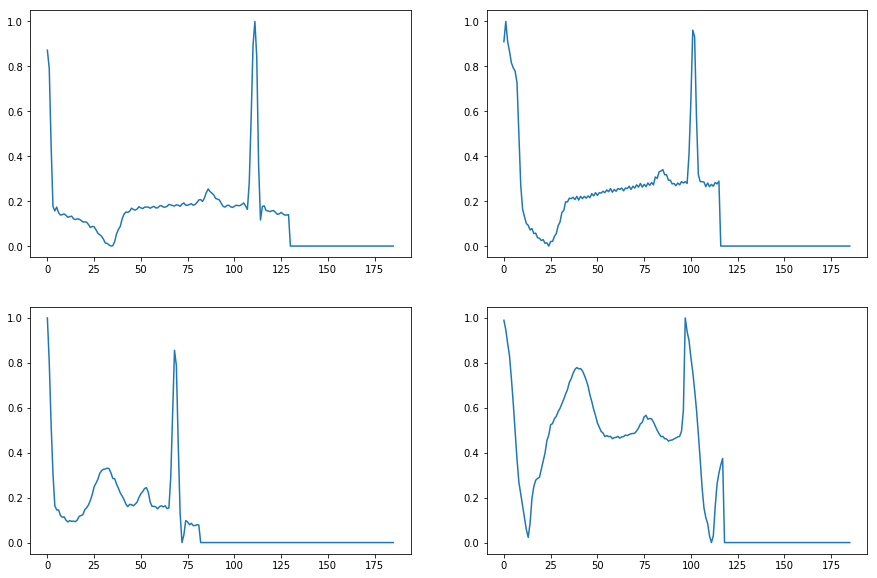

In [17]:
f, axes = plt.subplots(2, 2, sharex=False, sharey=False) 
f.set_figheight(10)
f.set_figwidth(15)
axes[0,0].plot(c.iloc[1,:186])
axes[0,1].plot(c.iloc[2,:186])
axes[1,0].plot(c.iloc[3,:186])
axes[1,1].plot(c.iloc[4,:186])